In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:

# Load data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
#df.head()


In [3]:

# Check for missing values in the 'Review Text' column
missing_values = df['Review Text'].isnull().sum()
if missing_values > 0:
    df = df.dropna(subset=['Review Text'])  # Drop rows with missing values in 'Review Text'
    print(f"Dropped {missing_values} rows with missing 'Review Text' values.")


Dropped 845 rows with missing 'Review Text' values.


In [4]:

# Define target variables
X = df['Review Text']
y = df['Recommended IND']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

# Use TfidfVectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [6]:

# Initialize and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)

# Initialize and train a decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_tfidf, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:

# Make predictions on the test set for both models
logistic_predictions = logistic_model.predict(X_test_tfidf)
decision_tree_predictions = decision_tree_model.predict(X_test_tfidf)

# Get Probability estimates
y_pred_proba_log = logistic_model.predict_proba(X_test_tfidf)[:,1]
y_pred_proba_tree = decision_tree_model.predict_proba(X_test_tfidf)[:,1]

# Calculate ROC curve for each model
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)



Text(0.5, 0.98, 'ROC Curves')

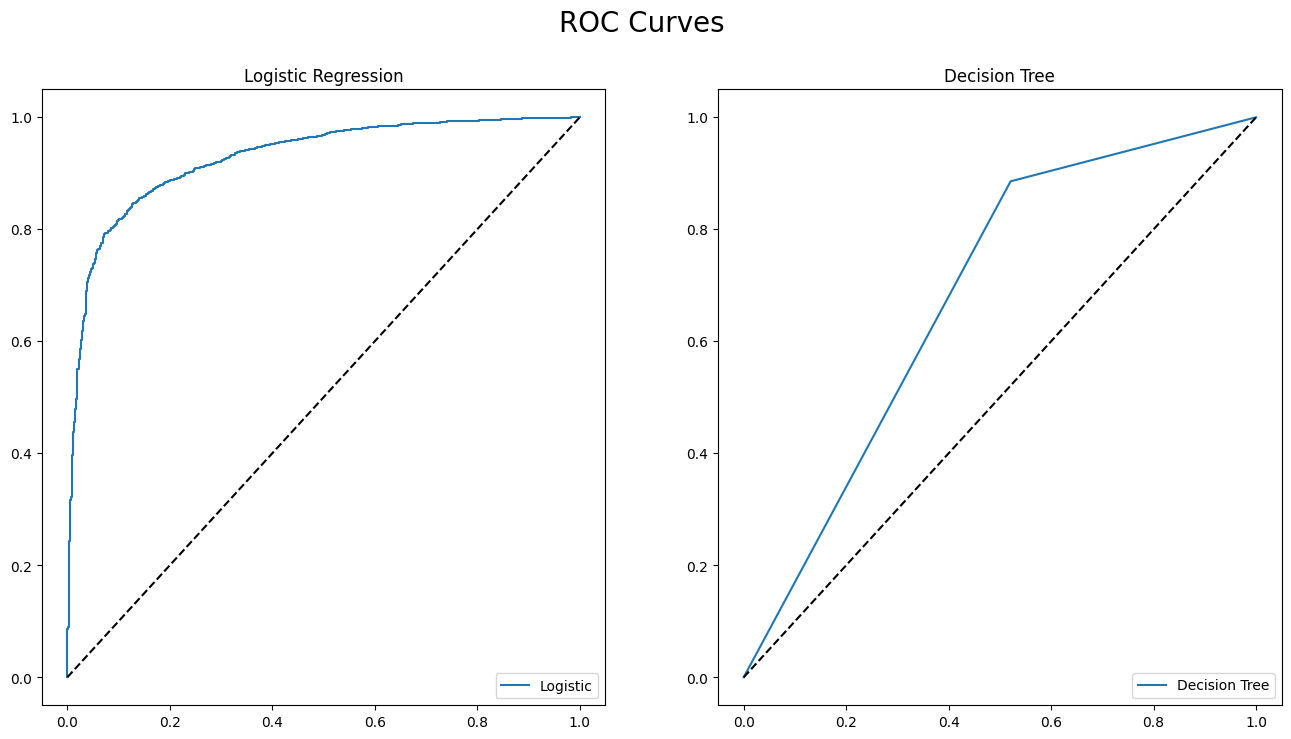

In [8]:
# Plot both on same figure  
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].plot(fpr_log, tpr_log, label="Logistic")
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_title('Logistic Regression')
ax[0].legend(loc="lower right")

ax[1].plot(fpr_tree, tpr_tree, label="Decision Tree")
ax[1].plot([0, 1], [0, 1], 'k--')  
ax[1].set_title('Decision Tree') 
ax[1].legend(loc="lower right")

fig.suptitle('ROC Curves', fontsize=20) 


In [9]:
# Calculating optimum threshold for each ROC Curve
# Calculate Youden's J statistic for each threshold
youden_log = tpr_log - fpr_log
youden_tree = tpr_tree - fpr_tree

# Find the optimal threshold for each model
optimal_threshold_log = thresholds_log[np.argmax(youden_log)]
optimal_threshold_tree = thresholds_tree[np.argmax(youden_tree)]

print("Optimal Threshold for Logistic Regression:", optimal_threshold_log)
print("Optimal Threshold for Decision Tree:", optimal_threshold_tree)


Optimal Threshold for Logistic Regression: 0.8557969739606
Optimal Threshold for Decision Tree: 1.0


In [10]:

# Evaluate the logistic regression model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
logistic_class_report = classification_report(y_test, logistic_predictions)

print("Logistic Regression Model:")
print(f'Accuracy: {logistic_accuracy:.2f}')
print(f'Confusion Matrix:\n{logistic_conf_matrix}')
print(f'Classification Report:\n{logistic_class_report}')


Logistic Regression Model:
Accuracy: 0.89
Confusion Matrix:
[[ 428  384]
 [ 132 3585]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.62       812
           1       0.90      0.96      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.83      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529



In [11]:

# Evaluate the decision tree model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predictions)
decision_tree_class_report = classification_report(y_test, decision_tree_predictions)

print("\nDecision Tree Model:")
print(f'Accuracy: {decision_tree_accuracy:.2f}')
print(f'Confusion Matrix:\n{decision_tree_conf_matrix}')
print(f'Classification Report:\n{decision_tree_class_report}')



Decision Tree Model:
Accuracy: 0.81
Confusion Matrix:
[[ 389  423]
 [ 425 3292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       812
           1       0.89      0.89      0.89      3717

    accuracy                           0.81      4529
   macro avg       0.68      0.68      0.68      4529
weighted avg       0.81      0.81      0.81      4529



In [12]:
# Example prompt for testing the models
prompt1 = ["This is a great product! I highly recommend it."]
prompt2 = ["This is bad. I hate it."]

# Transform the prompt using the TfidfVectorizer
prompt1_tfidf = vectorizer.transform(prompt1)
prompt2_tfidf = vectorizer.transform(prompt2)

# Make predictions for both models and both prompts
logistic_prediction1 = logistic_model.predict(prompt1_tfidf)
decision_tree_prediction1= decision_tree_model.predict(prompt1_tfidf)

logistic_prediction2 = logistic_model.predict(prompt2_tfidf)
decision_tree_prediction2= decision_tree_model.predict(prompt2_tfidf)

# Print the predictions
print("Prompt 1: Logistic Regression Model Prediction:", logistic_prediction1[0])
print("Prompt 1: Decision Tree Model Prediction:", decision_tree_prediction1[0])
print("Prompt 2: Logistic Regression Model Prediction:", logistic_prediction2[0])
print("Prompt 2: Decision Tree Model Prediction:", decision_tree_prediction2[0])



Prompt 1: Logistic Regression Model Prediction: 1
Prompt 1: Decision Tree Model Prediction: 1
Prompt 2: Logistic Regression Model Prediction: 0
Prompt 2: Decision Tree Model Prediction: 0


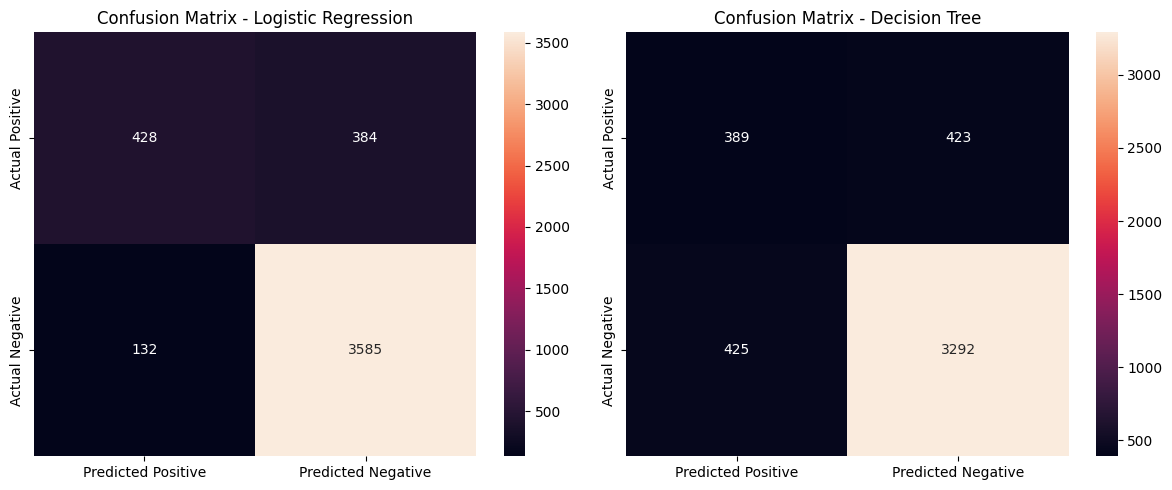

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first confusion matrix (Logistic Regression) in the first subplot
confusion_matrix_log = pd.DataFrame(logistic_conf_matrix, index=["Actual Positive", "Actual Negative"],
                                    columns=["Predicted Positive", "Predicted Negative"])
sns.heatmap(confusion_matrix_log, annot=True, fmt="d", ax=axes[0])

# Add a title to the first subplot
axes[0].set_title("Confusion Matrix - Logistic Regression")

# Plot the second confusion matrix (Decision Tree) in the second subplot
confusion_matrix_dec = pd.DataFrame(decision_tree_conf_matrix, index=["Actual Positive", "Actual Negative"],
                                    columns=["Predicted Positive", "Predicted Negative"])
sns.heatmap(confusion_matrix_dec, annot=True, fmt="d", ax=axes[1])

# Add a title to the second subplot
axes[1].set_title("Confusion Matrix - Decision Tree")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


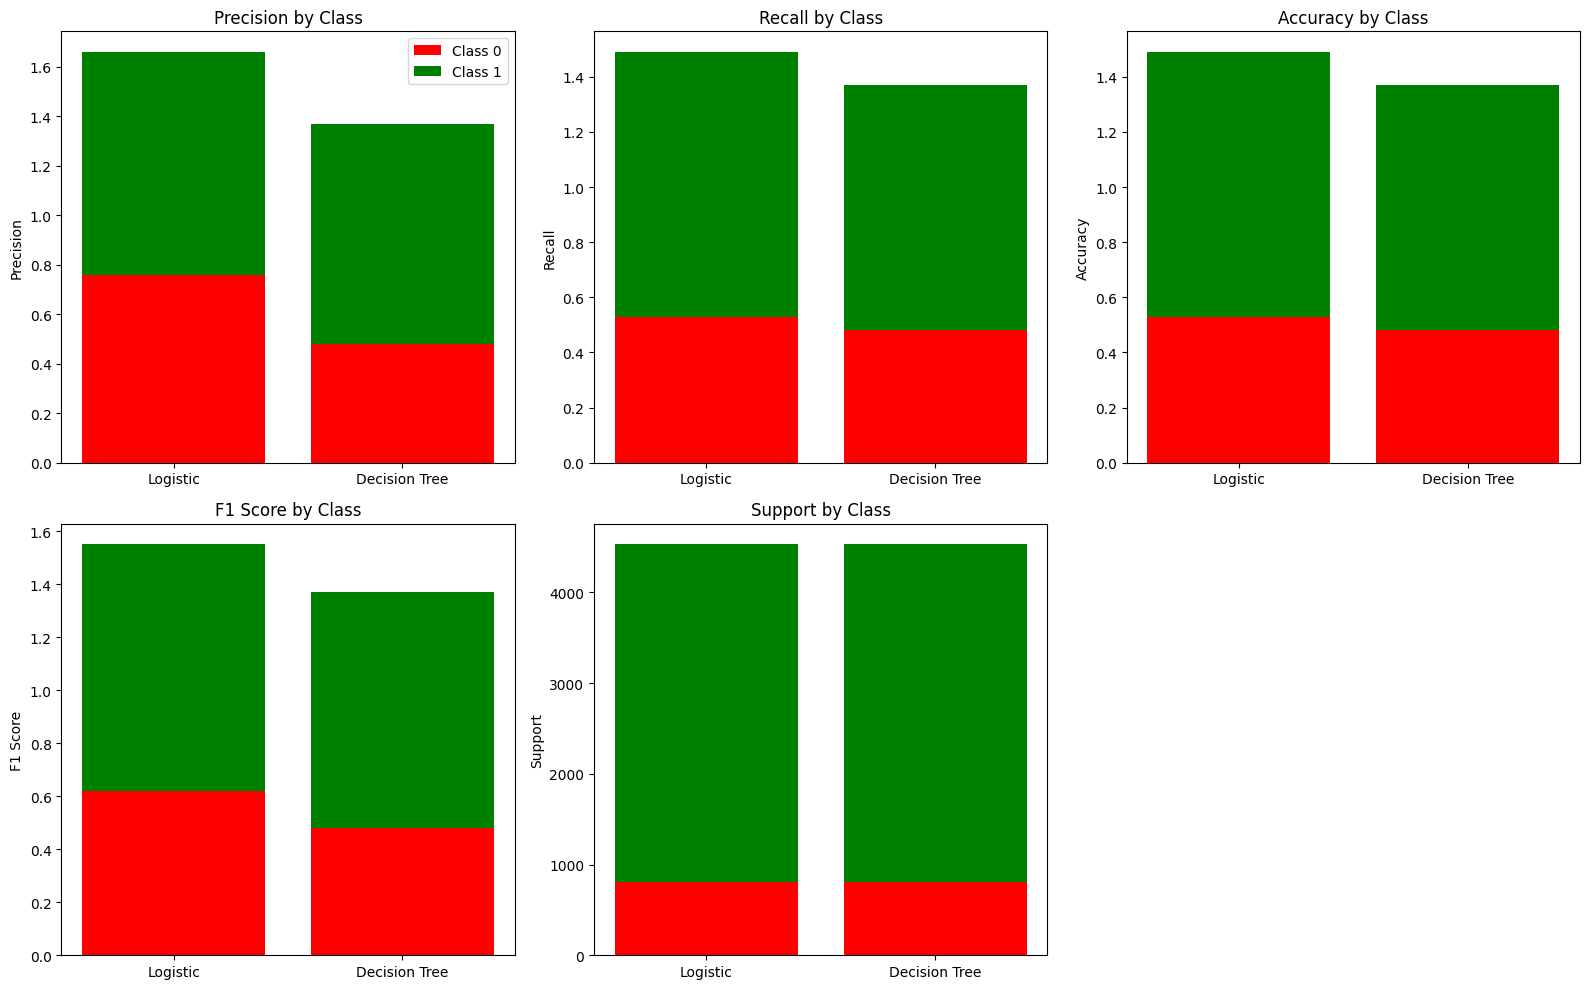

In [14]:
# Model scores
models = ["Logistic", "Decision Tree"]

# Class 0 scores 
c0_precision = [0.76, 0.48] 
c0_recall = [0.53, 0.48]
c0_accuracy = [0.53, 0.48]
c0_f1 = [0.62, 0.48]  # Add F1 score
c0_support = [812, 812]  # Add support

# Class 1 scores
c1_precision = [0.90, 0.89]  
c1_recall = [0.96, 0.89] 
c1_accuracy = [0.96, 0.89]
c1_f1 = [0.93, 0.89]  # Add F1 score
c1_support = [3717, 3717]  # Add support

# Create figure and axes
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

# Precision plot 
axs[0, 0].bar(models, c0_precision, color='red')
axs[0, 0].bar(models, c1_precision, bottom=c0_precision, color='green')
axs[0, 0].set(ylabel="Precision", title="Precision by Class")
axs[0, 0].legend(labels=["Class 0", "Class 1"])

# Recall plot
axs[0, 1].bar(models, c0_recall, color='red') 
axs[0, 1].bar(models, c1_recall, bottom=c0_recall, color='green')
axs[0, 1].set(ylabel="Recall", title="Recall by Class")

# Accuracy plot 
axs[0, 2].bar(models, c0_accuracy, color='red')
axs[0, 2].bar(models, c1_accuracy , bottom=c0_accuracy, color='green') 
axs[0, 2].set(ylabel="Accuracy", title="Accuracy by Class")

# F1 Score plot
axs[1, 0].bar(models, c0_f1, color='red')
axs[1, 0].bar(models, c1_f1, bottom=c0_f1, color='green')
axs[1, 0].set(ylabel="F1 Score", title="F1 Score by Class")

# Support plot
axs[1, 1].bar(models, c0_support, color='red')
axs[1, 1].bar(models, c1_support, bottom=c0_support, color='green')
axs[1, 1].set(ylabel="Support", title="Support by Class")

# Empty plot for better layout
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()